# XGBRegressor Model

In [1]:
#imported python packages
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error

import time
import pickle
import joblib

In [2]:
# imported training dataset
train_df = pd.read_csv('train.csv')
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150047 entries, 0 to 3150046
Data columns (total 28 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date_block_num                  int64  
 1   shop_id                         int64  
 2   item_id                         int64  
 3   item_price                      float64
 4   item_cnt_day                    float64
 5   revenue                         float64
 6   item_cnt_month                  float64
 7   city_code                       int64  
 8   item_category_id                int64  
 9   type_code                       int64  
 10  subtype_code                    int64  
 11  date_avg_item_cnt               float64
 12  date_item_avg_item_cnt          float64
 13  date_shop_avg_item_cnt          float64
 14  date_cat_avg_item_cnt           float64
 15  date_shop_cat_avg_item_cnt      float64
 16  date_shop_type_avg_item_cnt     float64
 17  date_shop_subtype_avg_item_

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_cnt_month,city_code,item_category_id,type_code,...,date_city_avg_item_cnt,date_item_city_avg_item_cnt,date_type_avg_item_cnt,date_subtype_avg_item_cnt,item_avg_item_price,date_item_avg_item_price,date_shop_revenue,shop_avg_revenue,delta_revenue,month
0,0,59,22154,999.00,1.0,999.00,1.0,31,37,11,...,3.836,1.0,3.697,2.463,410.5,999.0,1633431.0,1292188.0,0.2642,0
1,0,25,2552,899.00,1.0,899.00,0.0,14,58,13,...,5.152,0.0,2.076,1.253,938.0,899.0,5376478.0,6185159.0,-0.1307,0
2,0,25,2552,899.00,-1.0,-899.00,0.0,14,58,13,...,5.152,0.0,2.076,1.253,938.0,899.0,5376478.0,6185159.0,-0.1307,0
3,0,25,2554,1709.05,1.0,1709.05,1.0,14,58,13,...,5.152,1.0,2.076,1.253,1709.0,1709.0,5376478.0,6185159.0,-0.1307,0
4,0,25,2555,1099.00,1.0,1099.00,1.0,14,56,13,...,5.152,1.0,2.076,1.226,1123.0,1099.0,5376478.0,6185159.0,-0.1307,0


In [3]:
# dropped item_id as decided in vizualization notebook
train_df.drop(['item_id'],axis=1,inplace=True)

In [4]:
# training, validation, and test dataset is created.
X_train_df = train_df[train_df.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train_df = train_df[train_df.date_block_num < 33]['item_cnt_month']
X_valid = train_df[train_df.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = train_df[train_df.date_block_num == 33]['item_cnt_month']
X_test = train_df[train_df.date_block_num == 34].drop(['item_cnt_month'], axis=1)

### Attempt to create a XGB model after understanding the data

In [5]:
# instantiated XGB model
model = XGBRegressor(
    learning_rate=0.05,
    max_depth=16,
    n_estimators=200,
    seed=42,
    eval_metric="rmse", 
    early_stopping_rounds = 10)

In [6]:
# train the model 
model.fit(
    X_train_df, 
    Y_train_df, 
    eval_set=[(X_train_df, Y_train_df), (X_valid, Y_valid)], 
    verbose=10)

[0]	validation_0-rmse:6.42219	validation_1-rmse:6.01848
[10]	validation_0-rmse:3.91944	validation_1-rmse:3.75985
[20]	validation_0-rmse:2.43544	validation_1-rmse:2.46850
[30]	validation_0-rmse:1.56570	validation_1-rmse:1.76755
[40]	validation_0-rmse:1.06814	validation_1-rmse:1.41615
[50]	validation_0-rmse:0.79460	validation_1-rmse:1.25261
[60]	validation_0-rmse:0.64344	validation_1-rmse:1.17998
[70]	validation_0-rmse:0.56010	validation_1-rmse:1.14600
[80]	validation_0-rmse:0.51245	validation_1-rmse:1.12999
[90]	validation_0-rmse:0.48417	validation_1-rmse:1.12073
[100]	validation_0-rmse:0.46536	validation_1-rmse:1.11650
[110]	validation_0-rmse:0.45035	validation_1-rmse:1.11428
[120]	validation_0-rmse:0.44020	validation_1-rmse:1.11229
[130]	validation_0-rmse:0.43023	validation_1-rmse:1.11271


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=16, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [7]:
# get the predictions for the validation data
Y_pred = model.predict(X_valid).clip(0, 20)

In [8]:
Y_pred

array([0.999008 , 3.042239 , 1.5928766, ..., 1.7632958, 1.000315 ,
       0.9998179], dtype=float32)

In [9]:
# RMSE metric for the predicted and actual data
print('XGBoost RMSE =', mean_squared_error(Y_valid,Y_pred, squared=False))

XGBoost RMSE = 1.1122946146613604


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

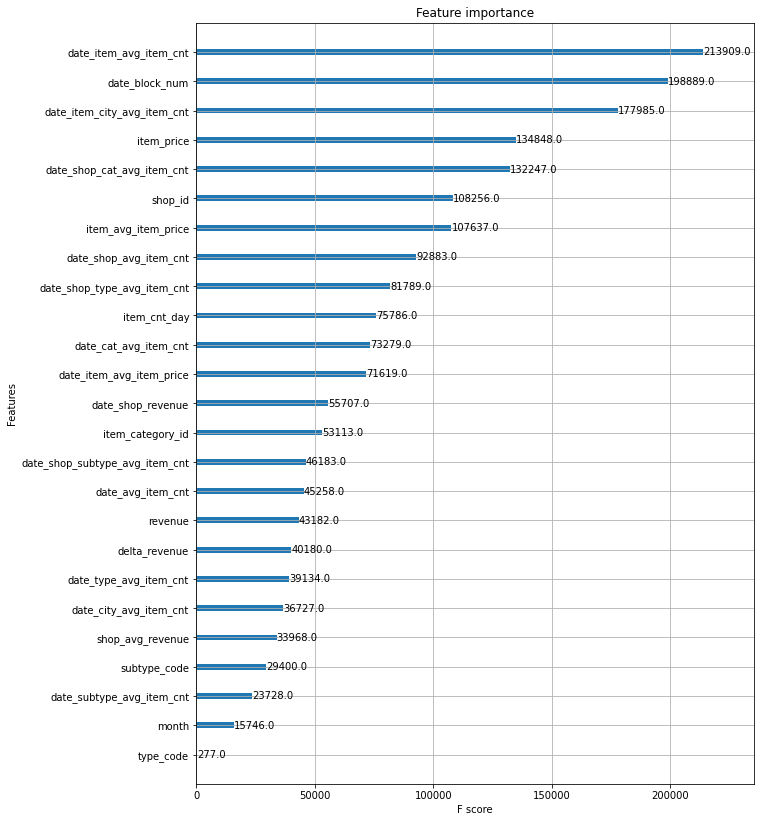

In [10]:
# importance of each feature plotted
fig, ax = plt.subplots(1,1,figsize=(10,14))
plot_importance(booster=model, ax=ax)

#### date_shop_avg_item_cnt - Mean no. of items sold per month for each month and item_category_id has the highest f-score. While type code has the lowest f-score

In [13]:
# Model saved
filename = "xgb_model.joblib"
joblib.dump(model, filename)

['xgb_model.joblib']